In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def get_data(url_without_page):
        
    prices_tags = list()
    meters_tags = list()
    neighborhood_tags = list()

    for x in range(1, 70):
        url = url_without_page+f"/?pagina={x}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content)
        
        prices_tags+=soup.find_all('div', attrs={'class':'property-card__price js-property-card-prices js-property-card__price-small'})
        meters_tags+=soup.find_all('span', attrs={'class':'property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area'})
        neighborhood_tags+=soup.find_all('span', attrs={'class': 'property-card__address'})
        

    prices = [price.text.replace('R$', '').replace('.', '').strip() for price in prices_tags]
    meters = [meter.text.strip() for meter in meters_tags]
    neighborhoods = [neighborhood.text for neighborhood in neighborhood_tags]
    address = [neighborhood.text.replace('Avenida Nove de Julho, 2005 - Bela Vista, ', '').replace(' - SP', '').strip() for neighborhood in neighborhood_tags]
    

    df = pd.DataFrame({'price': prices, 'meter': meters, 'neighborhood': neighborhoods})
    df = df[(df.price!='Sob Consulta')&
            (df.price.map(lambda x: 'Mês' not in x))&
            (df.price.map(lambda x: 'A partir de' not in x))&
            (df.meter.map(lambda x: '-' not in x))].copy()

    df.price = df.price.astype(int)
    df.meter = df.meter.astype(int)

    df['square_meter'] = df.price/df.meter
    
    return df


In [2]:
df_belavista = get_data('https://www.vivareal.com.br/venda/sp/sao-paulo/centro/bela-vista/avenida-nove-de-julho')
df_jardimpaulista = get_data('https://www.vivareal.com.br/venda/sp/sao-paulo/zona-sul/jardim-paulista/avenida-nove-de-julho')
df_itaimbibi = get_data('https://www.vivareal.com.br/venda/sp/sao-paulo/zona-sul/itaim-bibi/avenida-nove-de-julho')

In [3]:
df_belavista['smallneigh'] = 'belavista'
df_jardimpaulista['smallneigh'] = 'jardimpaulista'
df_itaimbibi['smallneigh'] = 'itaimbibi'

In [4]:
response = requests.get('https://www.vivareal.com.br/venda/sp/sao-paulo/zona-sul/jardim-paulista/avenida-nove-de-julho/')

In [5]:
response.content

b' <!DOCTYPE html> <html lang="pt-BR" prefix="og: https://ogp.me/ns#"> <head> <meta name="msvalidate.01" content="5DB2670D7BB1D1D3E36C46F7C3D59380"> <meta name="omniverify" content="omni2c019e0"> <meta property="og:url" content="https://www.vivareal.com.br/venda/sp/sao-paulo/zona-sul/jardim-paulista/avenida-nove-de-julho/"> <meta property="og:type" content=""> <meta property="og:image" content=""> <meta property="og:image:type" content="image/jpeg"> <meta property="og:image:secure_url" content="">  <meta property="og:title" content="Im\xc3\xb3veis \xc3\xa0 venda na Avenida Nove de Julho - Jardim Paulista, S\xc3\xa3o Paulo - SP"> <meta property="og:description" content="Mais de 909 im\xc3\xb3veis \xc3\xa0 venda na Avenida Nove de Julho, Jardim Paulista, S\xc3\xa3o Paulo - SP? No Viva Real voc\xc3\xaa encontra muitas ofertas de im\xc3\xb3veis \xc3\xa0 venda na Avenida Nove de Julho."> <meta name="description" content="Mais de 909 im\xc3\xb3veis \xc3\xa0 venda na Avenida Nove de Julho, Ja

In [6]:
df_bigdata = pd.concat([df_belavista, df_jardimpaulista, df_itaimbibi], ignore_index=True, sort=False)

In [42]:
pd.set_option('display.max_rows', 6115)

In [43]:
df_bigdata.neighborhood

0       Avenida Nove de Julho, 2005 - Bela Vista, São ...
1                              Bela Vista, São Paulo - SP
2       Avenida Nove de Julho, 1143 - Bela Vista, São ...
3       Avenida Nove de Julho, 236 - Bela Vista, São P...
4       Avenida Nove de Julho - Bela Vista, São Paulo ...
5       Avenida Nove de Julho, 1952 - Bela Vista, São ...
6       Avenida Nove de Julho, 1183 - Bela Vista, São ...
7       Avenida Nove de Julho - Bela Vista, São Paulo ...
8       Avenida Nove de Julho, 1164 - Bela Vista, São ...
9                              Bela Vista, São Paulo - SP
10      Avenida Nove de Julho, 1101 - Bela Vista, São ...
11      Avenida Nove de Julho, 40 - Bela Vista, São Pa...
12                             Bela Vista, São Paulo - SP
13      Avenida Nove de Julho, 1301 - Bela Vista, São ...
14      Avenida Nove de Julho, 544 - Bela Vista, São P...
15                             Bela Vista, São Paulo - SP
16      Avenida Nove de Julho - Bela Vista, São Paulo ...
17      Avenid

In [8]:
df_belavista

,price,meter,neighborhood,square_meter,smallneigh
0,320000,40,"Avenida Nove de Julho, 2005 - Bela Vista, São ...",8000.000000,belavista
2,2000000,500,"Bela Vista, São Paulo - SP",4000.000000,belavista
3,330000,45,"Avenida Nove de Julho, 1143 - Bela Vista, São ...",7333.333333,belavista
4,500000,87,"Avenida Nove de Julho, 236 - Bela Vista, São P...",5747.126437,belavista
5,1390000,190,"Avenida Nove de Julho - Bela Vista, São Paulo ...",7315.789474,belavista
...,...,...,...,...,...
2479,319000,70,"Avenida Nove de Julho - Bela Vista, São Paulo ...",4557.142857,belavista
2480,221000,12,"Avenida Nove de Julho, 3597 - Bela Vista, São ...",18416.666667,belavista
2481,585000,110,"Avenida Nove de Julho, 1066 - Bela Vista, São ...",5318.181818,belavista
2482,235000,40,"Avenida Nove de Julho - Bela Vista, São Paulo ...",5875.000000,belavista


In [9]:
df_bigdata.groupby('smallneigh').square_meter.mean()

smallneigh
belavista          7465.564244
itaimbibi         13660.638550
jardimpaulista    12271.942576
Name: square_meter, dtype: float64

In [10]:
df_bigdata.groupby('smallneigh').square_meter.median()

smallneigh
belavista          6666.666667
itaimbibi         13020.833333
jardimpaulista    11449.275362
Name: square_meter, dtype: float64

In [11]:
df_bigdata.groupby('smallneigh').square_meter.std()

smallneigh
belavista         3371.899654
itaimbibi         3702.972712
jardimpaulista    5062.914256
Name: square_meter, dtype: float64

In [12]:
df_bigdata.groupby('smallneigh').size()

smallneigh
belavista         2192
itaimbibi         1997
jardimpaulista    1926
dtype: int64

<AxesSubplot:title={'center':'square_meter'}, xlabel='smallneigh'>

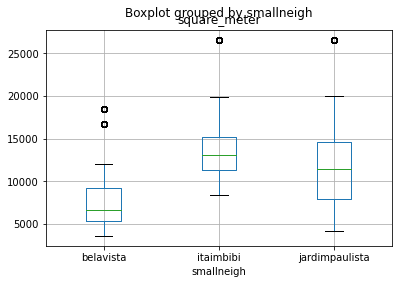

In [13]:
df_bigdata.boxplot(by= 'smallneigh', column = 'square_meter')

<AxesSubplot:>

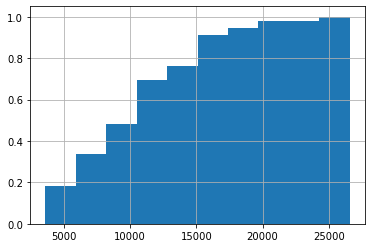

In [14]:
df_bigdata.square_meter.hist(cumulative=True, density = 1)

<AxesSubplot:>

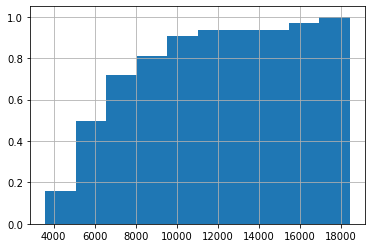

In [15]:
df_belavista.square_meter.hist(cumulative=True, density = 1)

<AxesSubplot:>

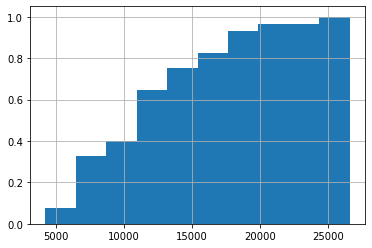

In [16]:
df_jardimpaulista.square_meter.hist(cumulative=True, density = 1)

<AxesSubplot:>

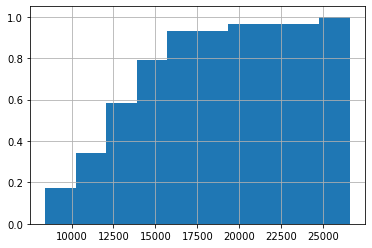

In [17]:
df_itaimbibi.square_meter.hist(cumulative=True, density = 1)

In [18]:
df_bigdata

,price,meter,neighborhood,square_meter,smallneigh
0,320000,40,"Avenida Nove de Julho, 2005 - Bela Vista, São ...",8000.000000,belavista
1,2000000,500,"Bela Vista, São Paulo - SP",4000.000000,belavista
2,330000,45,"Avenida Nove de Julho, 1143 - Bela Vista, São ...",7333.333333,belavista
3,500000,87,"Avenida Nove de Julho, 236 - Bela Vista, São P...",5747.126437,belavista
4,1390000,190,"Avenida Nove de Julho - Bela Vista, São Paulo ...",7315.789474,belavista
...,...,...,...,...,...
6110,3800000,235,"Itaim Bibi, São Paulo - SP",16170.212766,itaimbibi
6111,869500,103,"Itaim Bibi, São Paulo - SP",8441.747573,itaimbibi
6112,2886000,230,"Itaim Bibi, São Paulo - SP",12547.826087,itaimbibi
6113,32000000,2649,"Itaim Bibi, São Paulo - SP",12080.030200,itaimbibi


In [19]:
def get_number(address):
    try:
        return int(re.findall('[\d]+', address)[0])
    except:
        return np.nan

In [20]:
df_belavista.neighborhood.map(get_number)

0       2005.0
2          NaN
3       1143.0
4        236.0
5          NaN
         ...  
2479       NaN
2480    3597.0
2481    1066.0
2482       NaN
2483       NaN
Name: neighborhood, Length: 2192, dtype: float64

In [21]:
df_bigdata['numerores'] = df_bigdata.neighborhood.map(get_number)

In [22]:
df_bigdata['numerores'].describe()

count    2597.000000
mean     2605.886022
std      1646.214857
min        40.000000
25%      1066.000000
50%      3018.000000
75%      3624.000000
max      5739.000000
Name: numerores, dtype: float64

In [23]:
df_bigdata['gruposnumres'] = pd.cut(df_bigdata['numerores'], [0, 1000, 2000, 3000, 4000, 5000])

In [24]:
df_bigdata.neighborhood

0       Avenida Nove de Julho, 2005 - Bela Vista, São ...
1                              Bela Vista, São Paulo - SP
2       Avenida Nove de Julho, 1143 - Bela Vista, São ...
3       Avenida Nove de Julho, 236 - Bela Vista, São P...
4       Avenida Nove de Julho - Bela Vista, São Paulo ...
                              ...                        
6110                           Itaim Bibi, São Paulo - SP
6111                           Itaim Bibi, São Paulo - SP
6112                           Itaim Bibi, São Paulo - SP
6113                           Itaim Bibi, São Paulo - SP
6114    Avenida Nove de Julho - Itaim Bibi, São Paulo ...
Name: neighborhood, Length: 6115, dtype: object

In [25]:
df_bigdata.loc[0,'neighborhood']

'Avenida Nove de Julho, 2005 - Bela Vista, São Paulo - SP'

In [26]:
df_bigdata.neighborhood.map(lambda x: x.replace('Avenida Nove de Julho, 2005 - Bela Vista, ', ''))
df_bigdata.neighborhood.map(lambda x: x.replace(' - SP', '') )

0       Avenida Nove de Julho, 2005 - Bela Vista, São ...
1                                   Bela Vista, São Paulo
2       Avenida Nove de Julho, 1143 - Bela Vista, São ...
3       Avenida Nove de Julho, 236 - Bela Vista, São P...
4           Avenida Nove de Julho - Bela Vista, São Paulo
                              ...                        
6110                                Itaim Bibi, São Paulo
6111                                Itaim Bibi, São Paulo
6112                                Itaim Bibi, São Paulo
6113                                Itaim Bibi, São Paulo
6114        Avenida Nove de Julho - Itaim Bibi, São Paulo
Name: neighborhood, Length: 6115, dtype: object

In [27]:
df_bigdata.neighborhood

0       Avenida Nove de Julho, 2005 - Bela Vista, São ...
1                              Bela Vista, São Paulo - SP
2       Avenida Nove de Julho, 1143 - Bela Vista, São ...
3       Avenida Nove de Julho, 236 - Bela Vista, São P...
4       Avenida Nove de Julho - Bela Vista, São Paulo ...
                              ...                        
6110                           Itaim Bibi, São Paulo - SP
6111                           Itaim Bibi, São Paulo - SP
6112                           Itaim Bibi, São Paulo - SP
6113                           Itaim Bibi, São Paulo - SP
6114    Avenida Nove de Julho - Itaim Bibi, São Paulo ...
Name: neighborhood, Length: 6115, dtype: object

In [28]:
df_bigdata.neighborhood

0       Avenida Nove de Julho, 2005 - Bela Vista, São ...
1                              Bela Vista, São Paulo - SP
2       Avenida Nove de Julho, 1143 - Bela Vista, São ...
3       Avenida Nove de Julho, 236 - Bela Vista, São P...
4       Avenida Nove de Julho - Bela Vista, São Paulo ...
                              ...                        
6110                           Itaim Bibi, São Paulo - SP
6111                           Itaim Bibi, São Paulo - SP
6112                           Itaim Bibi, São Paulo - SP
6113                           Itaim Bibi, São Paulo - SP
6114    Avenida Nove de Julho - Itaim Bibi, São Paulo ...
Name: neighborhood, Length: 6115, dtype: object

In [29]:
df_bigdata.groupby(['gruposnumres'])['square_meter'].median().sort_index()

gruposnumres
(0, 1000]       10792.000000
(1000, 2000]     5649.705635
(2000, 3000]     8583.333333
(3000, 4000]    14583.333333
(4000, 5000]    15175.294118
Name: square_meter, dtype: float64

In [30]:
df_bigdata.groupby(['smallneigh']).agg({'numerores':['min','max']})

numerores        
                     min     max
smallneigh                      
belavista           40.0  3597.0
itaimbibi          939.0  5739.0
jardimpaulista     411.0  4939.0

In [31]:
df_belavista.groupby(['smallneigh'])['square_meter'].median().sort_index()

smallneigh
belavista    6666.666667
Name: square_meter, dtype: float64

In [32]:
df_bigdata.to_csv('./bigdata.csv', sep=',',index=False)

In [33]:
df_bigdata

,price,meter,neighborhood,square_meter,smallneigh,numerores,gruposnumres
0,320000,40,"Avenida Nove de Julho, 2005 - Bela Vista, São ...",8000.000000,belavista,2005.0,"(2000.0, 3000.0]"
1,2000000,500,"Bela Vista, São Paulo - SP",4000.000000,belavista,NaN,NaN
2,330000,45,"Avenida Nove de Julho, 1143 - Bela Vista, São ...",7333.333333,belavista,1143.0,"(1000.0, 2000.0]"
3,500000,87,"Avenida Nove de Julho, 236 - Bela Vista, São P...",5747.126437,belavista,236.0,"(0.0, 1000.0]"
4,1390000,190,"Avenida Nove de Julho - Bela Vista, São Paulo ...",7315.789474,belavista,NaN,NaN
...,...,...,...,...,...,...,...
6110,3800000,235,"Itaim Bibi, São Paulo - SP",16170.212766,itaimbibi,NaN,NaN
6111,869500,103,"Itaim Bibi, São Paulo - SP",8441.747573,itaimbibi,NaN,NaN
6112,2886000,230,"Itaim Bibi, São Paulo - SP",12547.826087,itaimbibi,NaN,NaN
6113,32000000,2649,"Itaim Bibi, São Paulo - SP",12080.030200,itaimbibi,NaN,NaN


In [34]:
df_bigdata.address

AttributeError: 'DataFrame' object has no attribute 'address'